Download the MultiplexDOE repository. Go to https://github.com/kirstvh/MultiplexCrisprDOE --> code --> Download Zip.

#### Load packages

In [1]:
using Random 
using Plots  
using Distributions 
using LinearAlgebra
using Combinatorics
using BioCCP
using Images
using XLSX
using DataFrames


(process:12164): GLib-GIO-WARNING **: 10:31:01.147: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2107.2.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs


#### Load BioCCP- and simulation-based framework

In [2]:
include("MultiplexCrisprDOE.jl");

#### Define parameters of the multiplex CRISPR/Cas experiment

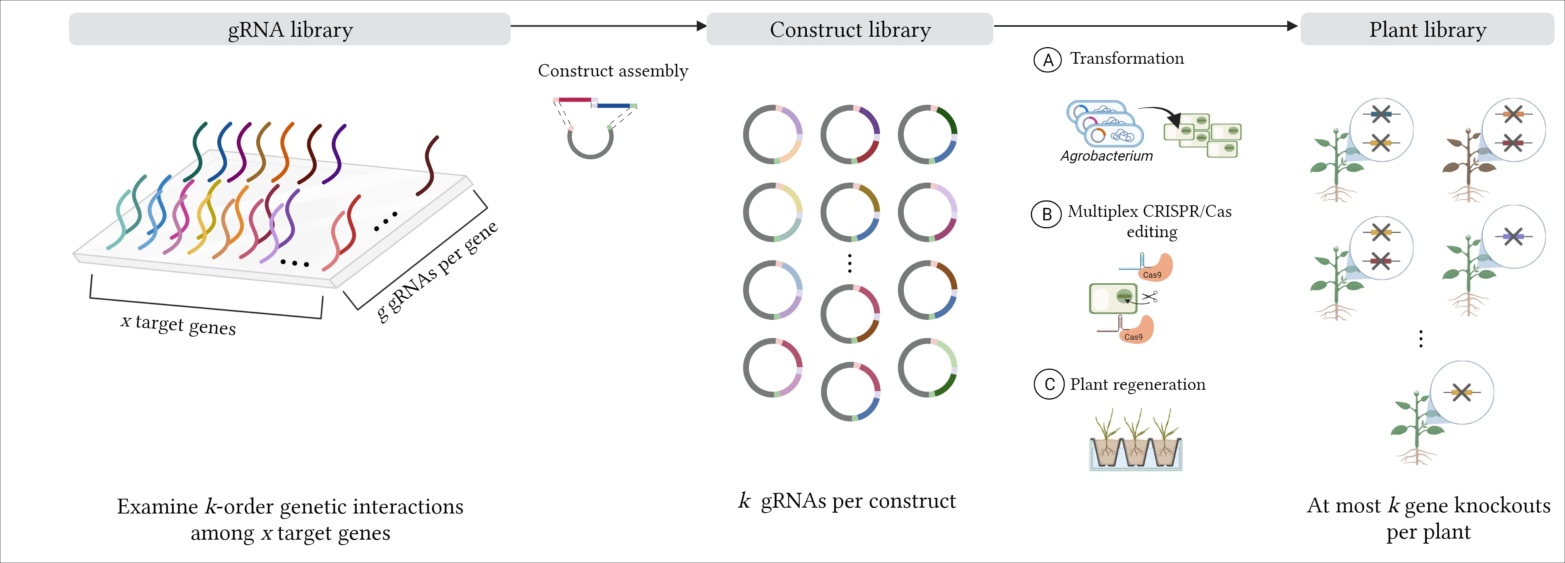

In [3]:
load("Figure1.png")

- Number of target genes

In [4]:
x = 20 

20

- Order of interaction to investigate

In [5]:
k = 2   # pairwise interactions

2

-  Number of gRNAs per target gene

In [7]:
g = 6
n_gRNA_total = x * g  # total number of gRNAs in the experiment

120

- Number of gRNAs per combinatorial gRNA/Cas construct

In [8]:
r = 2

2

- gRNA abundance distribution in construct library. You can (1) simulate a distribution or (2) add your own data.

In [58]:
#### (1) Simulated Distribution

Random.seed!(1)
ρ = 2; # ratio of the frequency of the most abundant gRNA and the frequency of the least abundant gRNA
l = 50; u = ρ*l
m = (l+u)/2; 
sd = (u-l)/2; 
p_gRNA_reads_simulated = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = false, visualize=false)
p_gRNA_reads_normalized_simulated = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)

#### (2) upload own data
#### Make sure that all gRNAs are ranked per target gene, and that for each target gene, there are g gRNAs
filename = "example_data.xlsx"
sheet = 1
data = DataFrame(XLSX.readtable(filename, 1)...)
p_gRNA_reads = data[!,"gRNA_read"]
p_gRNA_reads_normalized = reads/sum(reads)  # normalize

120-element Vector{Float64}:
 0.008125968392949027
 0.009796034447425429
 0.006083616475660973
 0.009063962709022351
 0.006030444682251089
 0.0074087693830702725
 0.006984032088040713
 0.009655159972726196
 0.00831466419423193
 0.009797609148721622
 0.008998177126334776
 0.008377920986289651
 0.007341293181433393
 ⋮
 0.010253707017942261
 0.008671525502943386
 0.010263081267566424
 0.005874531566599512
 0.01008150231393049
 0.007427876986680053
 0.009249898673201517
 0.011019630735267986
 0.005952815995704945
 0.008466306413266704
 0.0057838728641256805
 0.00935819889009223

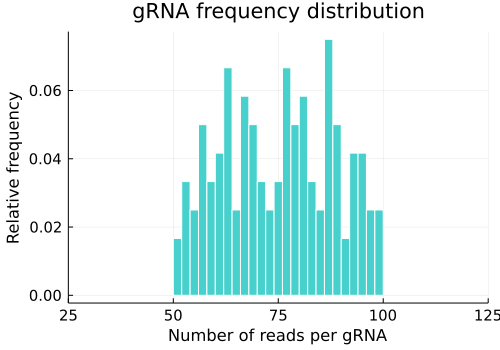

In [59]:
histogram(p_gRNA_reads, label="", 
            xlabel="Number of reads per gRNA", 
            linecolor="white", 
            normalize=:probability,
            xtickfontsize=10,ytickfontsize=10,
            color=:mediumturquoise, size=(500,350), bins = 25,
            xlim=((25, 125)),
            ylabel="Relative frequency", 
            title="gRNA frequency distribution")

- genome editing efficiency distribution of gRNAs: You can (1) simulate a distribution or (2) add your own data.

In [51]:
#### (1) Simulate distribution
Random.seed!(1)
f_act = 0.9  # fraction of all gRNAs that is active
ϵ_edit_act = 0.95;  # average genome editing efficiency of active gRNAs
ϵ_edit_inact = 0.1; # average genome editing efficiency of inactive gRNAs
sd_act = 0.01  # standard deviation 
p_gRNA_edit_simulated = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false); # generate genome editing distribution of the gRNAs

#### (2) Upload own data
#### Make sure that all gRNAs are ranked per target gene, and that for each target gene, there are g gRNAs
using DataFrames, XLSX
filename = "example_data.xlsx"
sheet = 1
data = DataFrame(XLSX.readtable(filename, 1)...)
p_gRNA_edit = data[!,"gRNA_edit_efficiency"]
p_gRNA_edit

120-element Vector{Any}:
 0.9449580589035336
 0.9452430196797036
 0.09266433340227233
 0.9423701848472701
 0.10321619808134028
 0.9627049569656667
 0.9395447520369903
 0.9531135601371798
 0.9518370418008055
 0.9505262183284477
 0.9706303763249241
 0.9545842613704938
 0.9556681395093564
 ⋮
 0.9408283314639972
 0.9662181650872971
 0.9438191693535104
 0.9502214266873628
 0.9405371770942497
 0.9393026358218804
 0.959144921013127
 0.9362898695621734
 0.941065257068899
 0.9498405267652607
 0.9552641044312585
 0.9408325436658986

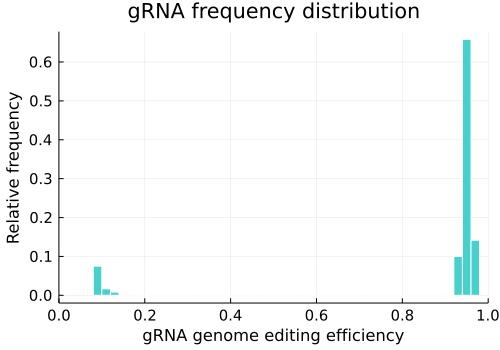

In [55]:
histogram(p_gRNA_edit, label="", 
            xlabel="gRNA genome editing efficiency", 
            linecolor="white", 
            normalize=:probability,
            xtickfontsize=10,ytickfontsize=10,
            color=:mediumturquoise, size=(500,350), bins = 60,
            xlim=((0,1)),
            ylabel="Relative frequency", 
            title="gRNA frequency distribution")

- global knockout efficiency; fraction of mutations leading to effective gene knockout

In [56]:
ϵ_KO = 0.8

0.8

#### How many plants need to be included in the plant library (on average) to obtain full coverage of all k-combinations of gene knockouts?

- Simulation-based framework

In [60]:
@time simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_reads_normalized, 
                                p_gRNA_edit, ϵ_KO; iter=500)

  7.264836 seconds (24.32 M allocations: 6.862 GiB, 11.56% gc time, 1.67% compilation time)


(2721.286, 655.0946146261807)

In [61]:
E_sim, sd_sim = simulate_Nₓ₂(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_reads_normalized, 
                                p_gRNA_edit, ϵ_KO; iter=500)

(2720.048, 634.7027152687617)

In [62]:
print("On average, ", Int(ceil(E_sim)), " plants need to be sampled at random to observe all ", k, "-combinations of ", x, " gene knockouts.")
print("\nStandard deviation = ", Int(ceil(sd_sim)), " plants")

On average, 2721 plants need to be sampled at random to observe all 2-combinations of 20 gene knockouts.
Standard deviation = 635 plants

- BioCCP-based approach

In [63]:
@time  BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_reads_normalized, 
                              p_gRNA_edit, ϵ_KO)

  1.346717 seconds (3.83 M allocations: 220.653 MiB, 3.36% gc time, 98.37% compilation time)


(2715, 661)

In [64]:
E_bioccp, sd_bioccp = BioCCP_Nₓ₂(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_reads_normalized, 
                              p_gRNA_edit, ϵ_KO)

(2715, 661)

In [65]:
print("On average, ", Int(ceil(E_bioccp)), " plants need to be sampled at random to observe all ", k, "-combinations of ", x, " gene knockouts.")
print("\nStandard deviation = ", Int(ceil(sd_bioccp)), " plants")

On average, 2715 plants need to be sampled at random to observe all 2-combinations of 20 gene knockouts.
Standard deviation = 661 plants

#### At a given number of plants, what is the expected coverage of pairwise gene knockout combinations?

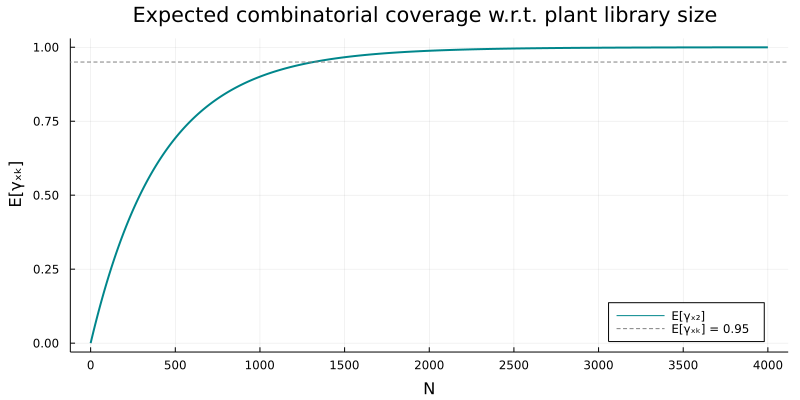

In [66]:
plant_library_sizes = 0:5:4000
expected_γₓ₂ = []

for N in plant_library_sizes  
    e_γₓ₂ = BioCCP_γₓ₂(x, 
                                         N,
                                         g, 
                                         r, 
                                         n_gRNA_total, 
                                         p_gRNA_reads_normalized, 
                                         p_gRNA_edit, ϵ_KO)
    push!(expected_γₓ₂, e_γₓ₂)
    if e_γₓ₂ < 0.95
        global N_95_γₓ₂ = N
    end
end
 
plot(plant_library_sizes, expected_γₓ₂,
label="E[γₓ₂]", title="Expected combinatorial coverage w.r.t. plant library size 
    ",
xlabel="N
    ", ylabel="
    E[γₓₖ]", 
        xticks = (0:500:50000, string.(0:500:50000)),
 size=(800,400), color=:turquoise4, linewidth=2)
hline!([0.95], linestyle=:dash, color=:grey, label="E[γₓₖ] = 0.95", legend=:bottomright)

In [67]:
N_95_γₓ₂

1315

#### At a given number of plants, what is the probability that all pairwise combinations of gene knockouts are observed?

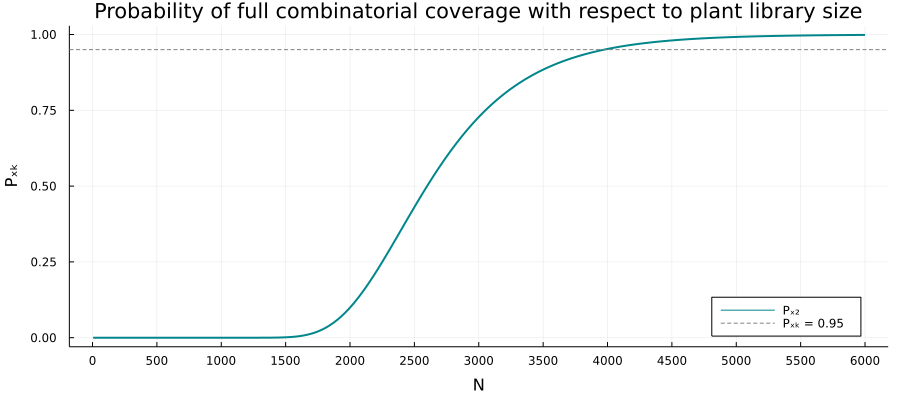

In [68]:
plant_library_sizes = 0:5:6000
Pₓ₂ = []

for N in plant_library_sizes
    Pₓ₂_ = BioCCP_Pₓ₂(x, 
                            N,
                            g, 
                            r, 
                            n_gRNA_total, 
                            p_gRNA_reads_normalized, 
                            p_gRNA_edit, 
                            ϵ_KO)
    
    push!(Pₓ₂, Pₓ₂_)
    
    if Pₓ₂_ < 0.95
        global N_95_Pₓ₂ = N
    end    
end
 
plot(plant_library_sizes, Pₓ₂, label="Pₓ₂", 
    title="Probability of full combinatorial coverage with respect to plant library size",
xlabel="N
    
    ", ylabel="
    Pₓₖ", 
        xticks = (0:500:50000, string.(0:500:50000)),
 size=(900,400), color=:turquoise4, linewidth=2)
hline!([0.95], linestyle=:dash, color=:grey, label="Pₓₖ = 0.95", legend=:bottomright)

In [69]:
N_95_Pₓ₂

3970